# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [6]:
label = pd.read_csv('_labels_.csv')
df = pd.read_csv('_data_.csv')

merge = pd.merge(df, label, on='patient_id')
merge

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [10]:
# To keep back-up

new_merge = merge.copy()

In [12]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [13]:
merge.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [15]:
import sweetviz as sv

report = sv.analyze(merge)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Plotting Data

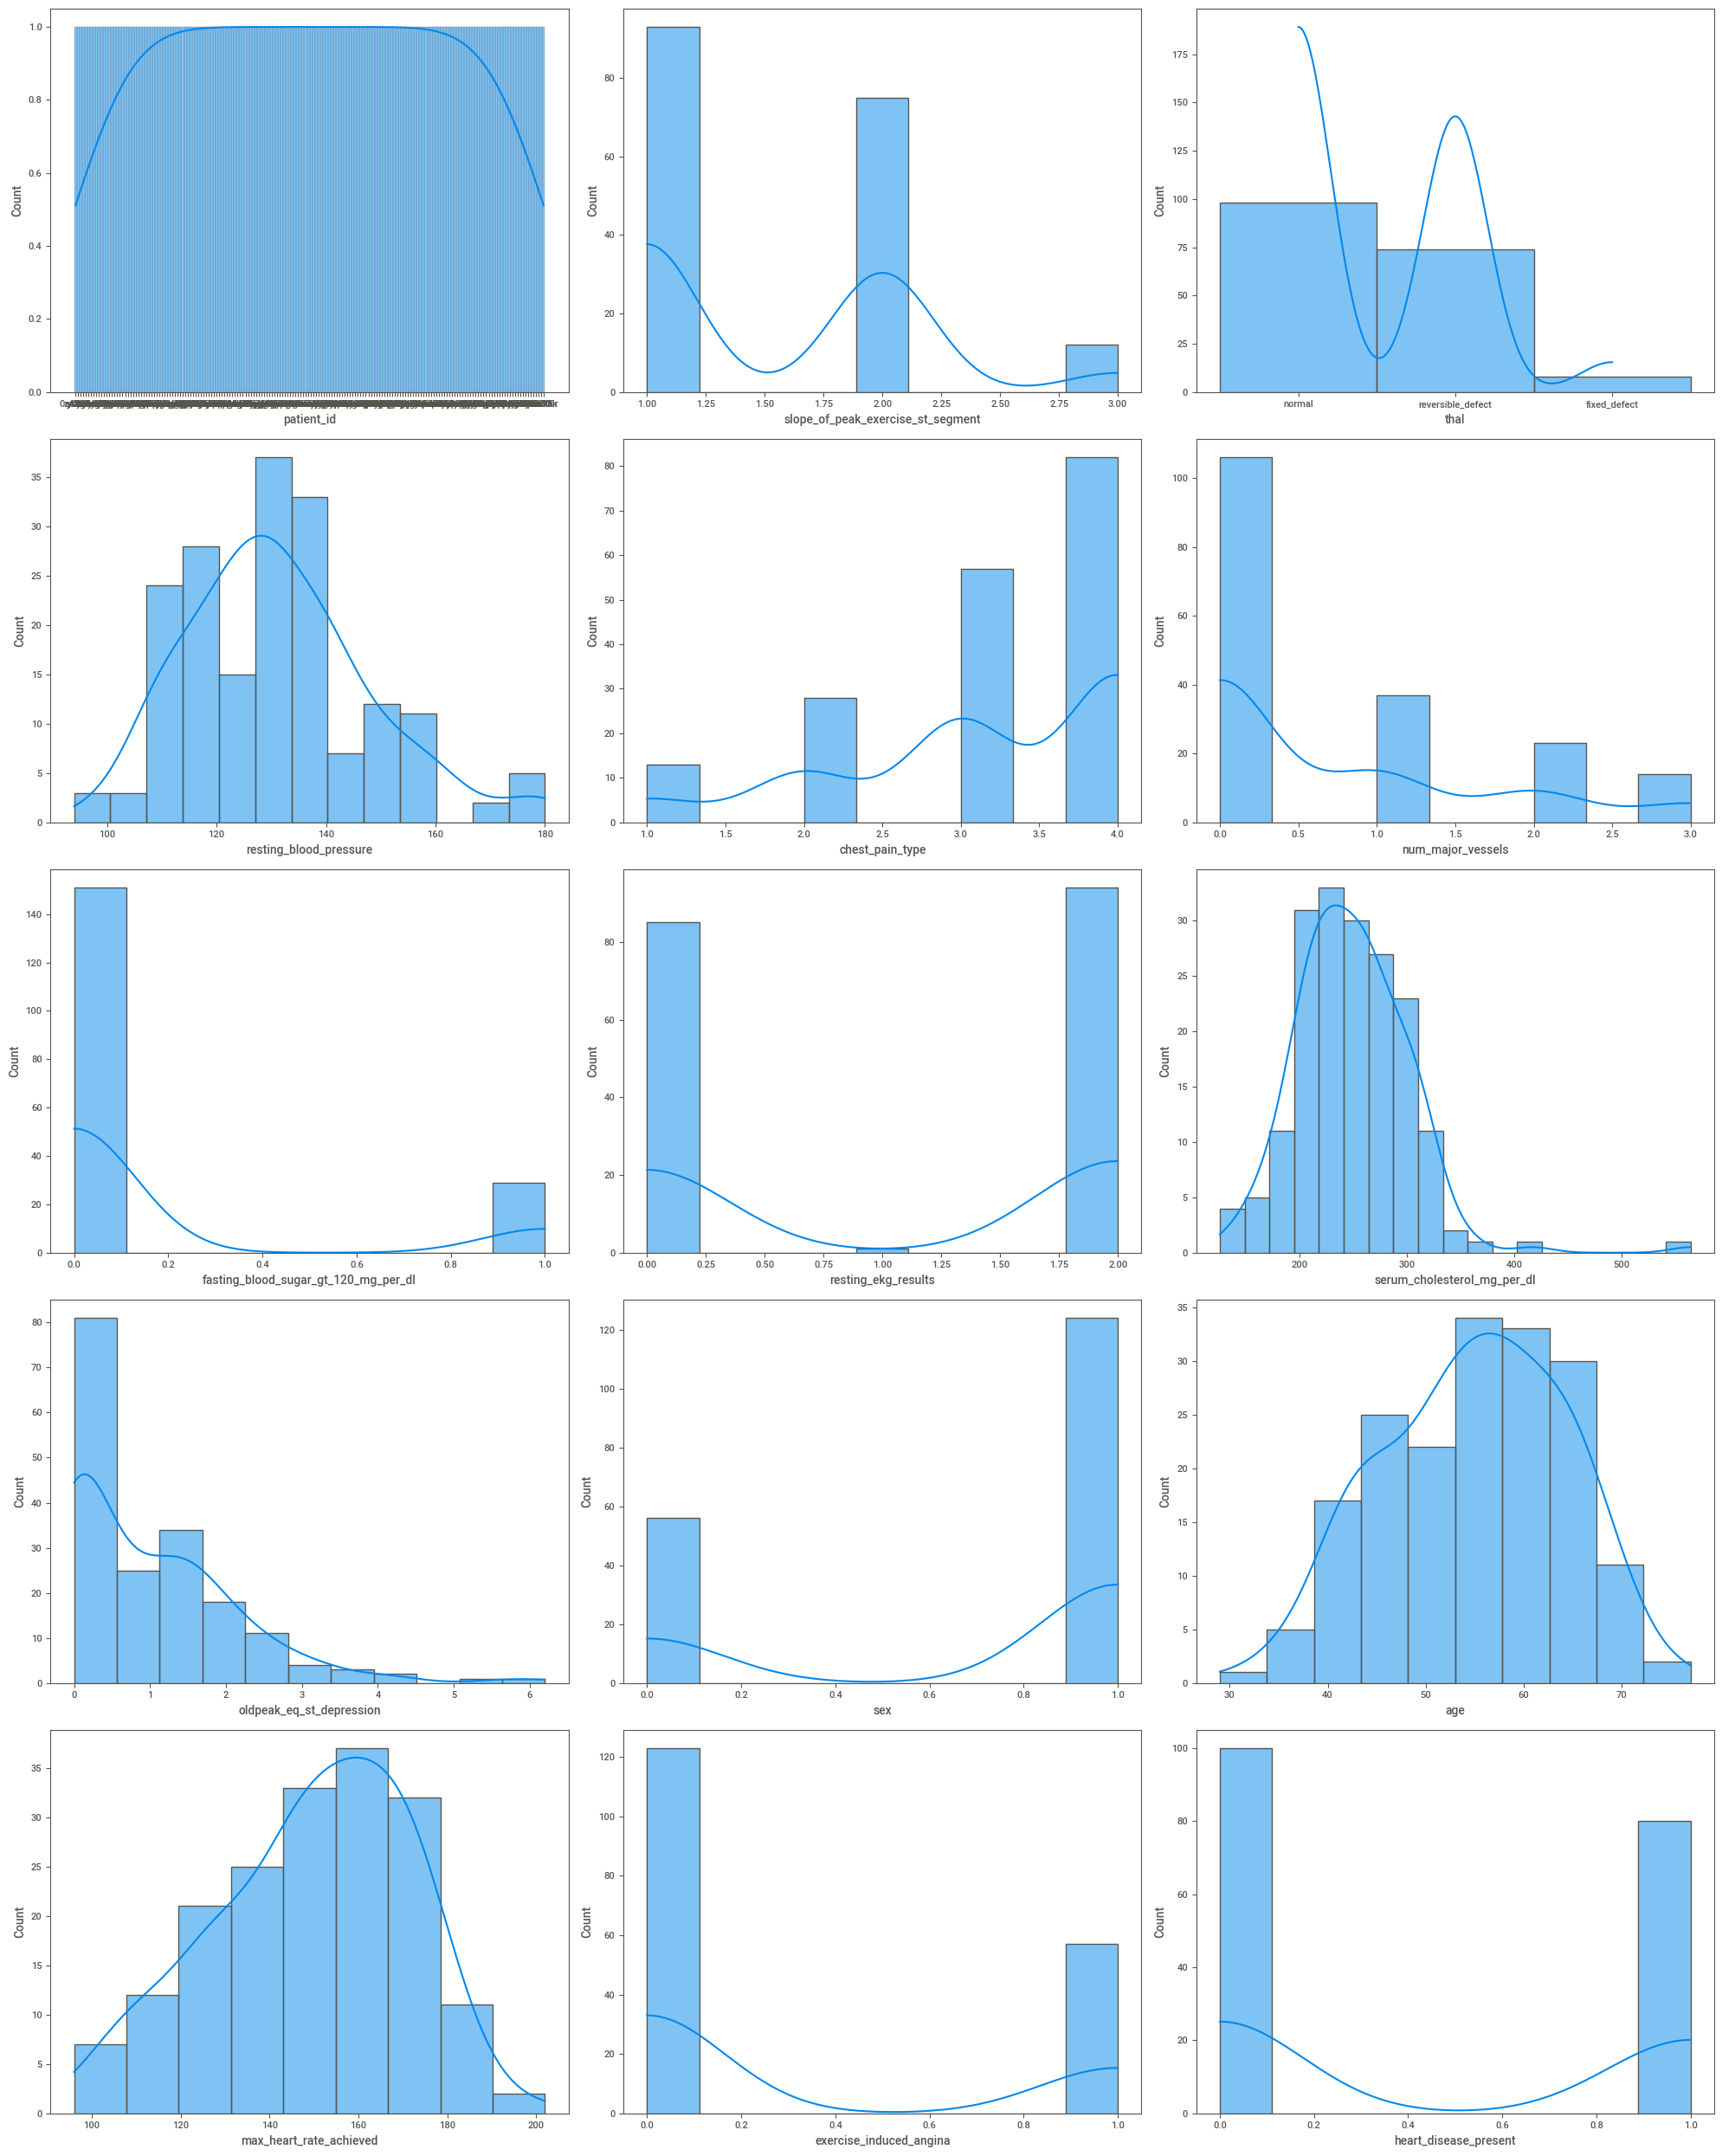

In [22]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnum = 1
for column in merge:
    plt.subplot(5, 3, plotnum)
    sns.histplot(merge[column], kde = True)
    plotnum = plotnum + 1
plt.tight_layout()

# Histplot

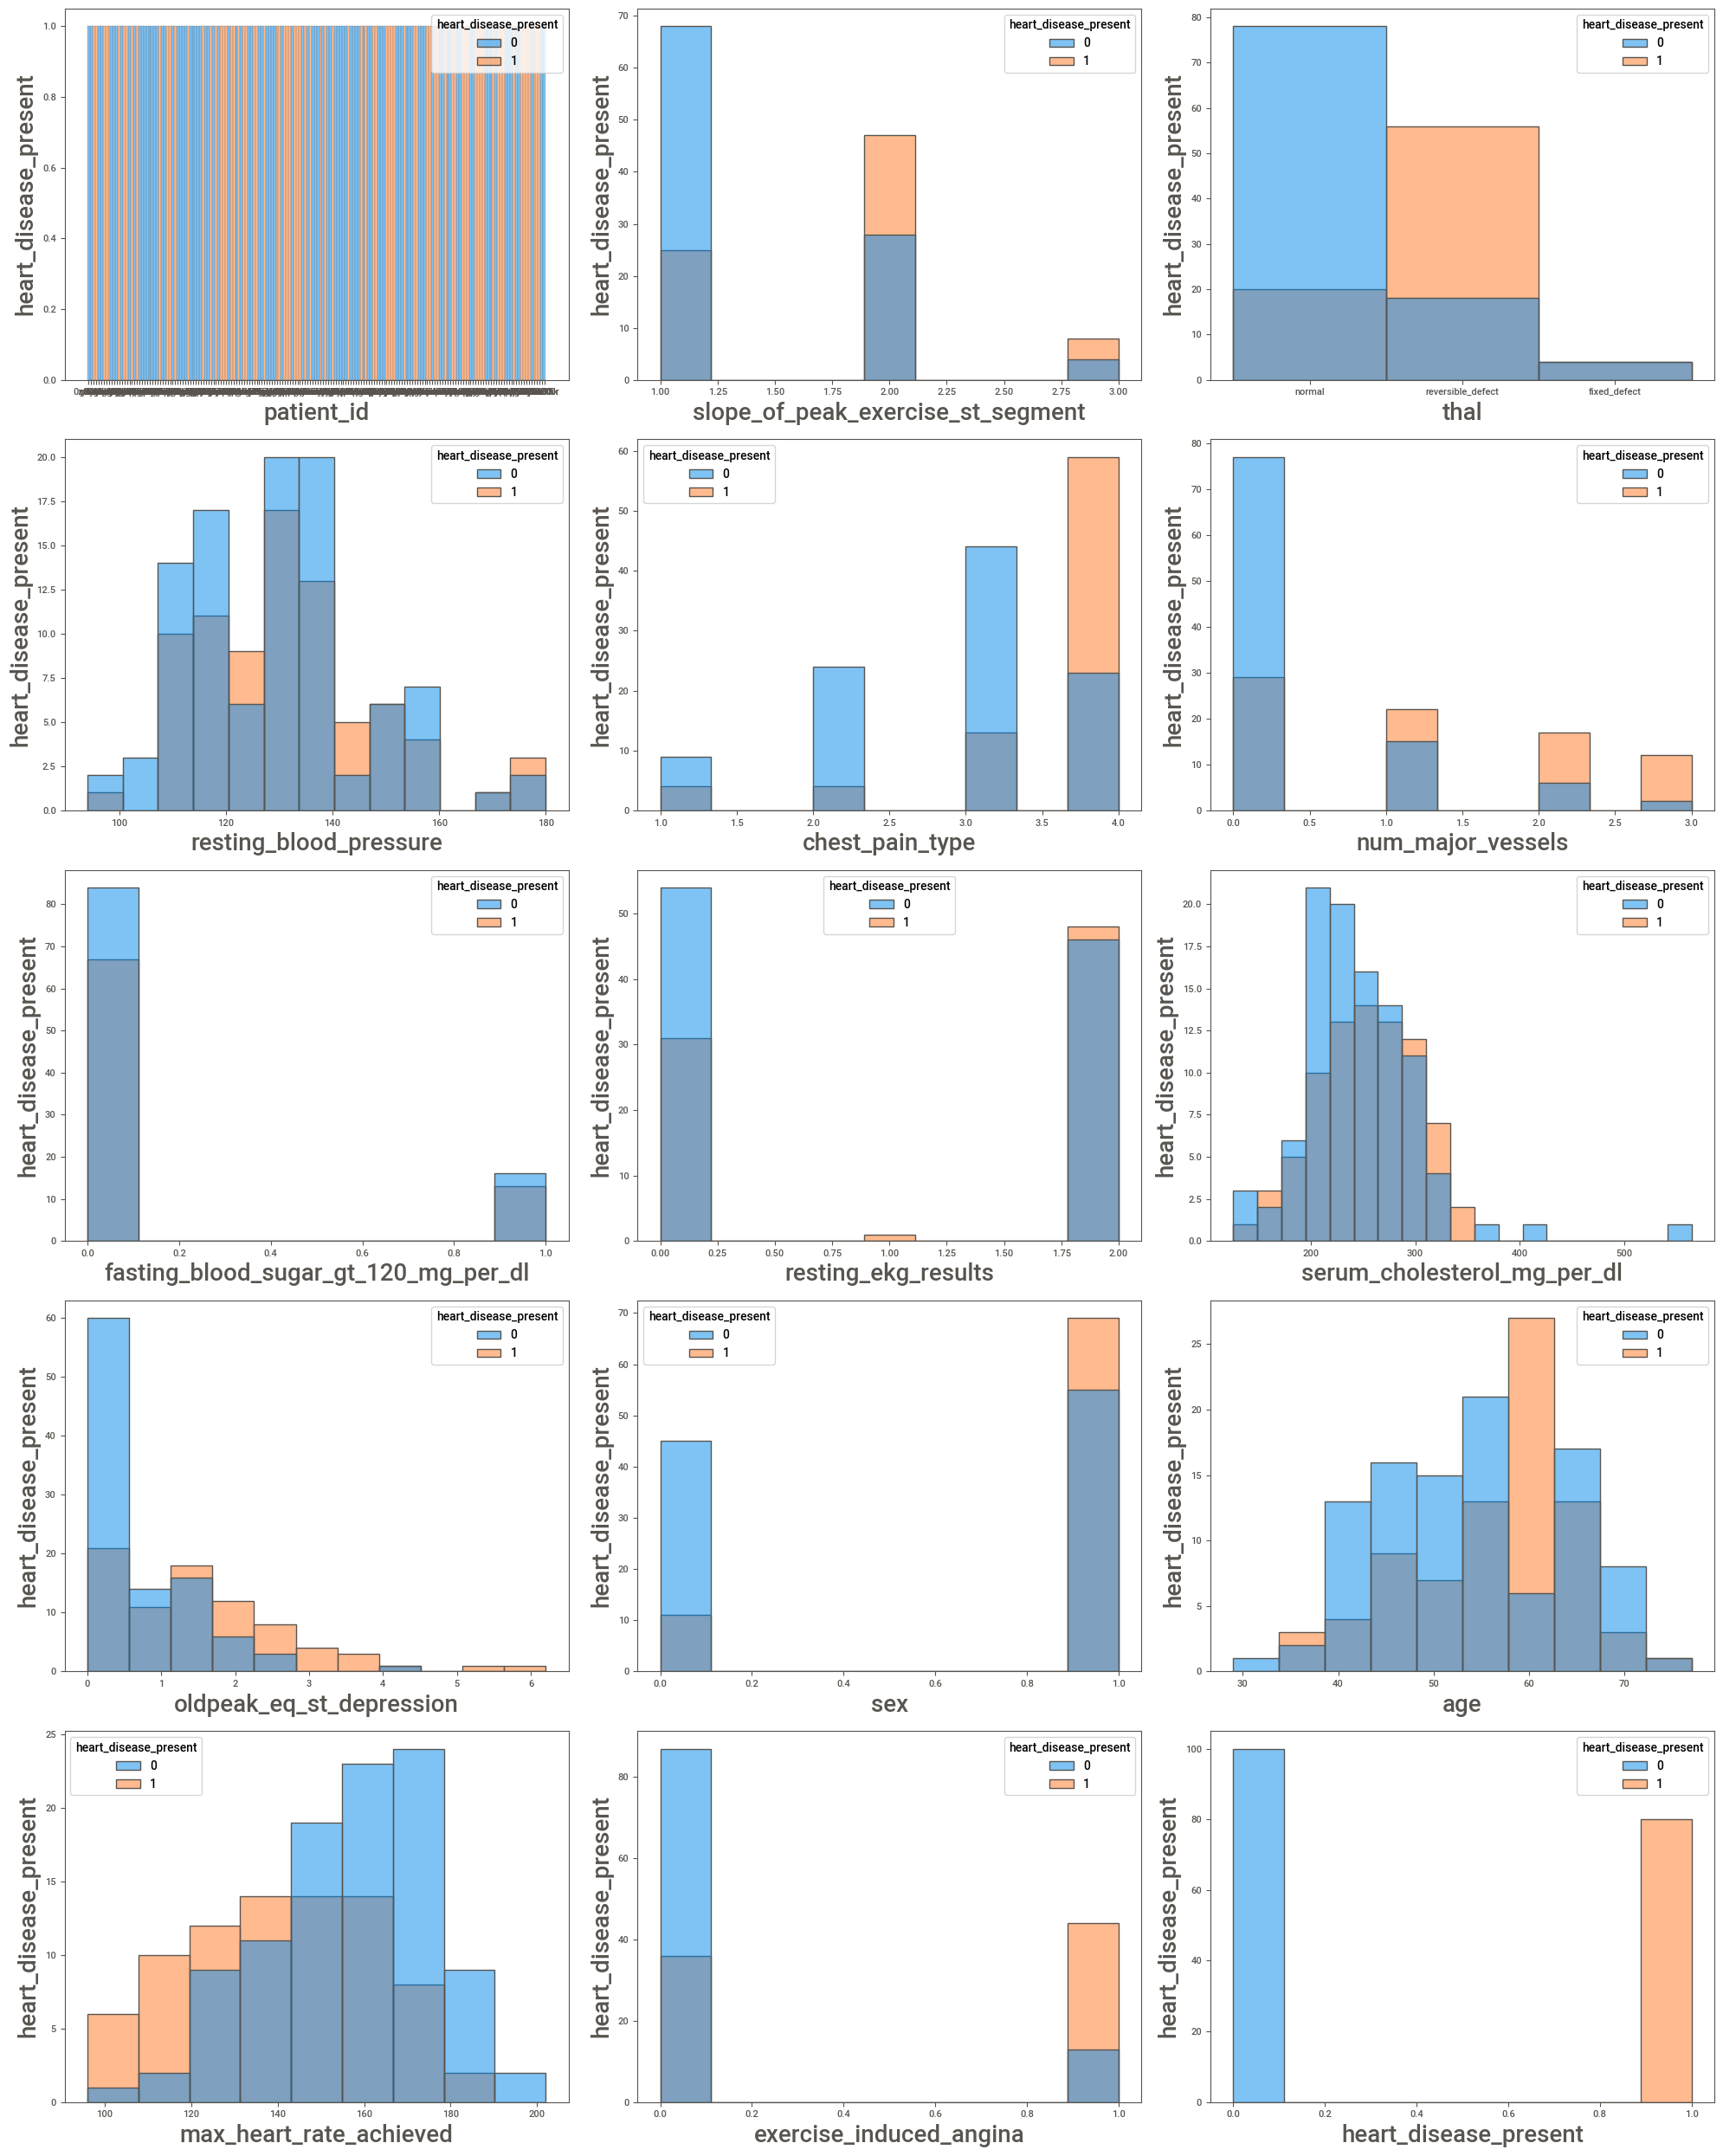

In [21]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in merge:
    if plotnumber <= 16 :
        ax = plt.subplot(5, 3, plotnumber)
        sns.histplot(x = merge[column], hue = merge['heart_disease_present'])
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('heart_disease_present', fontsize = 20)
    plotnumber += 1
plt.tight_layout()

# Scatter Plot

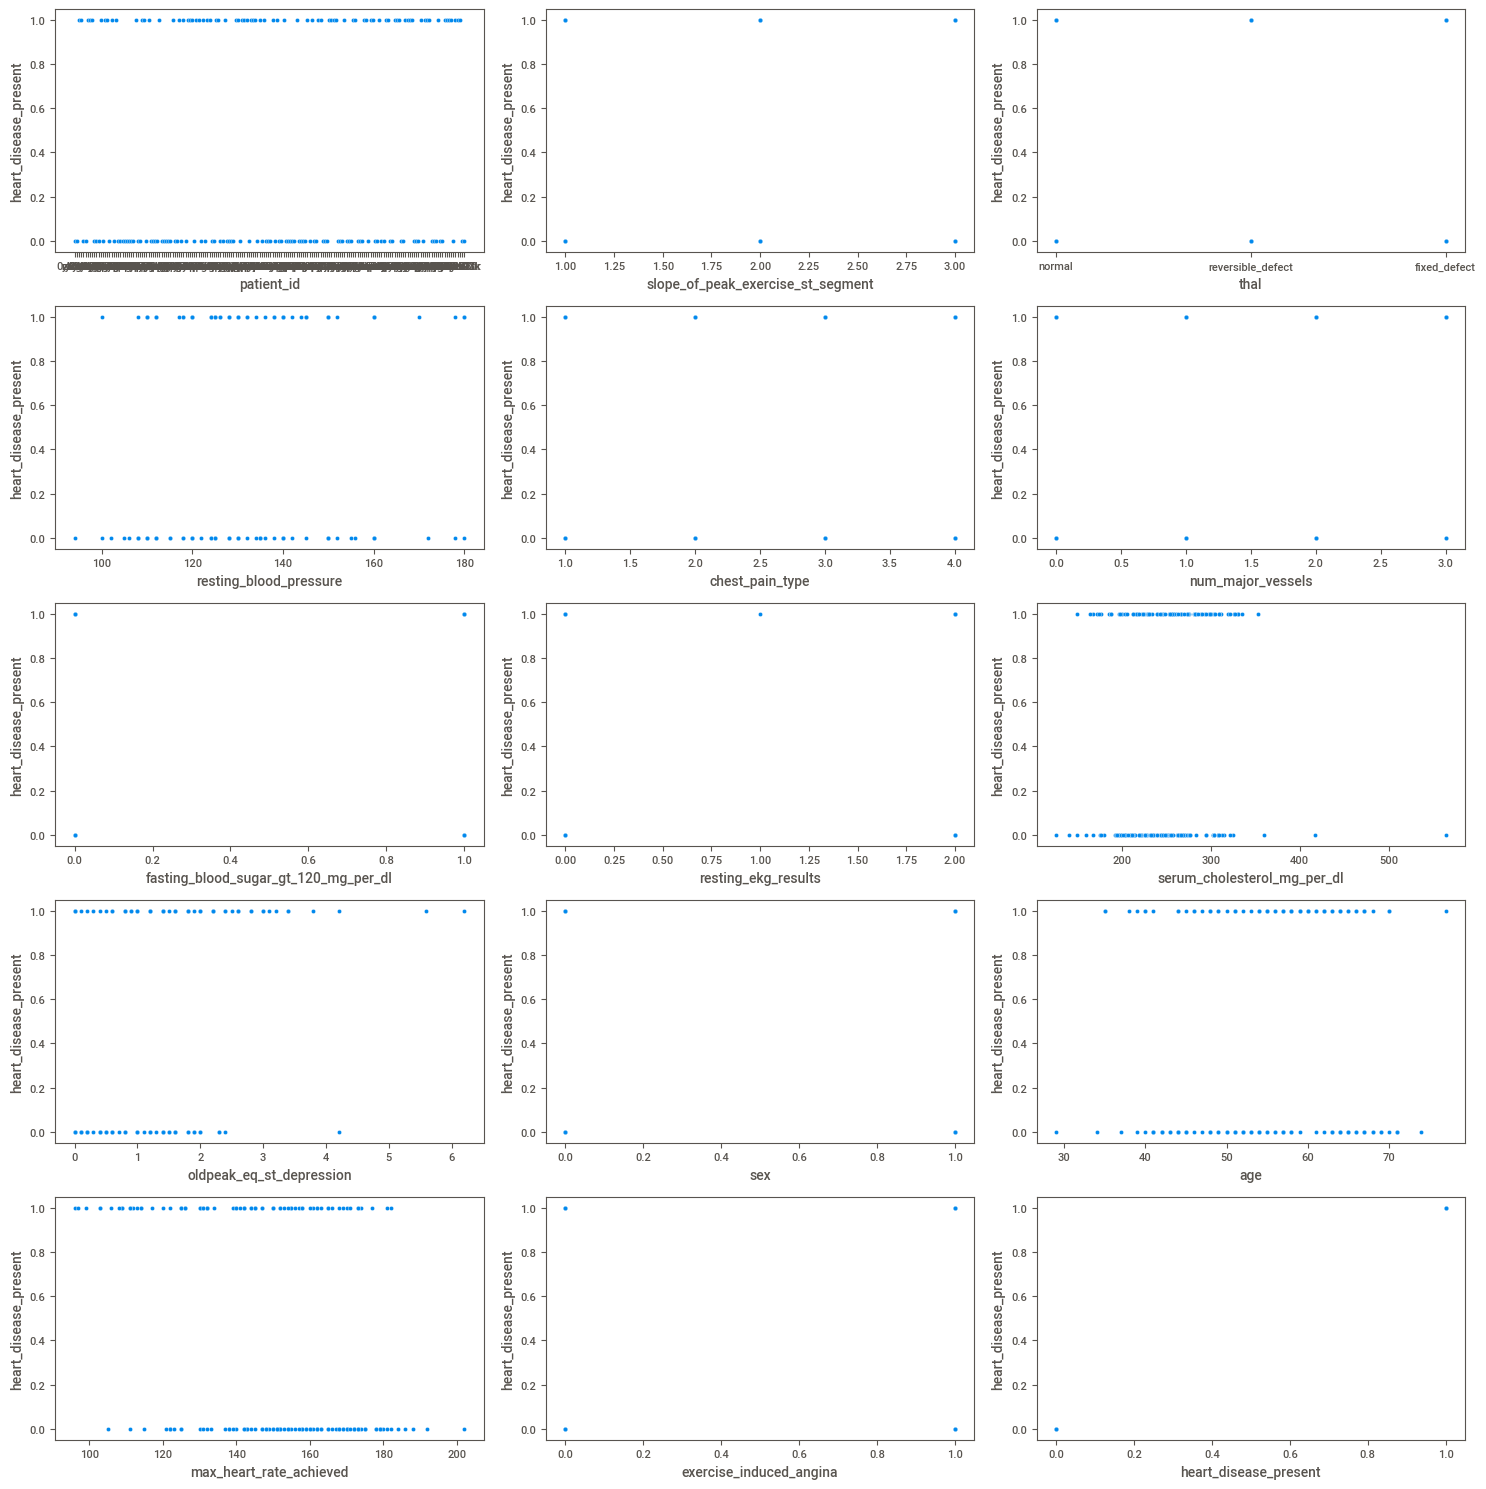

In [23]:
plt.figure(figsize=(15,15))
plotnumber=1
for column in merge:
    plt.subplot(5, 3, plotnumber)
    sns.scatterplot(x=column,y='heart_disease_present',data=merge)
    plotnumber=plotnumber+1
plt.tight_layout()

# Pair Plot

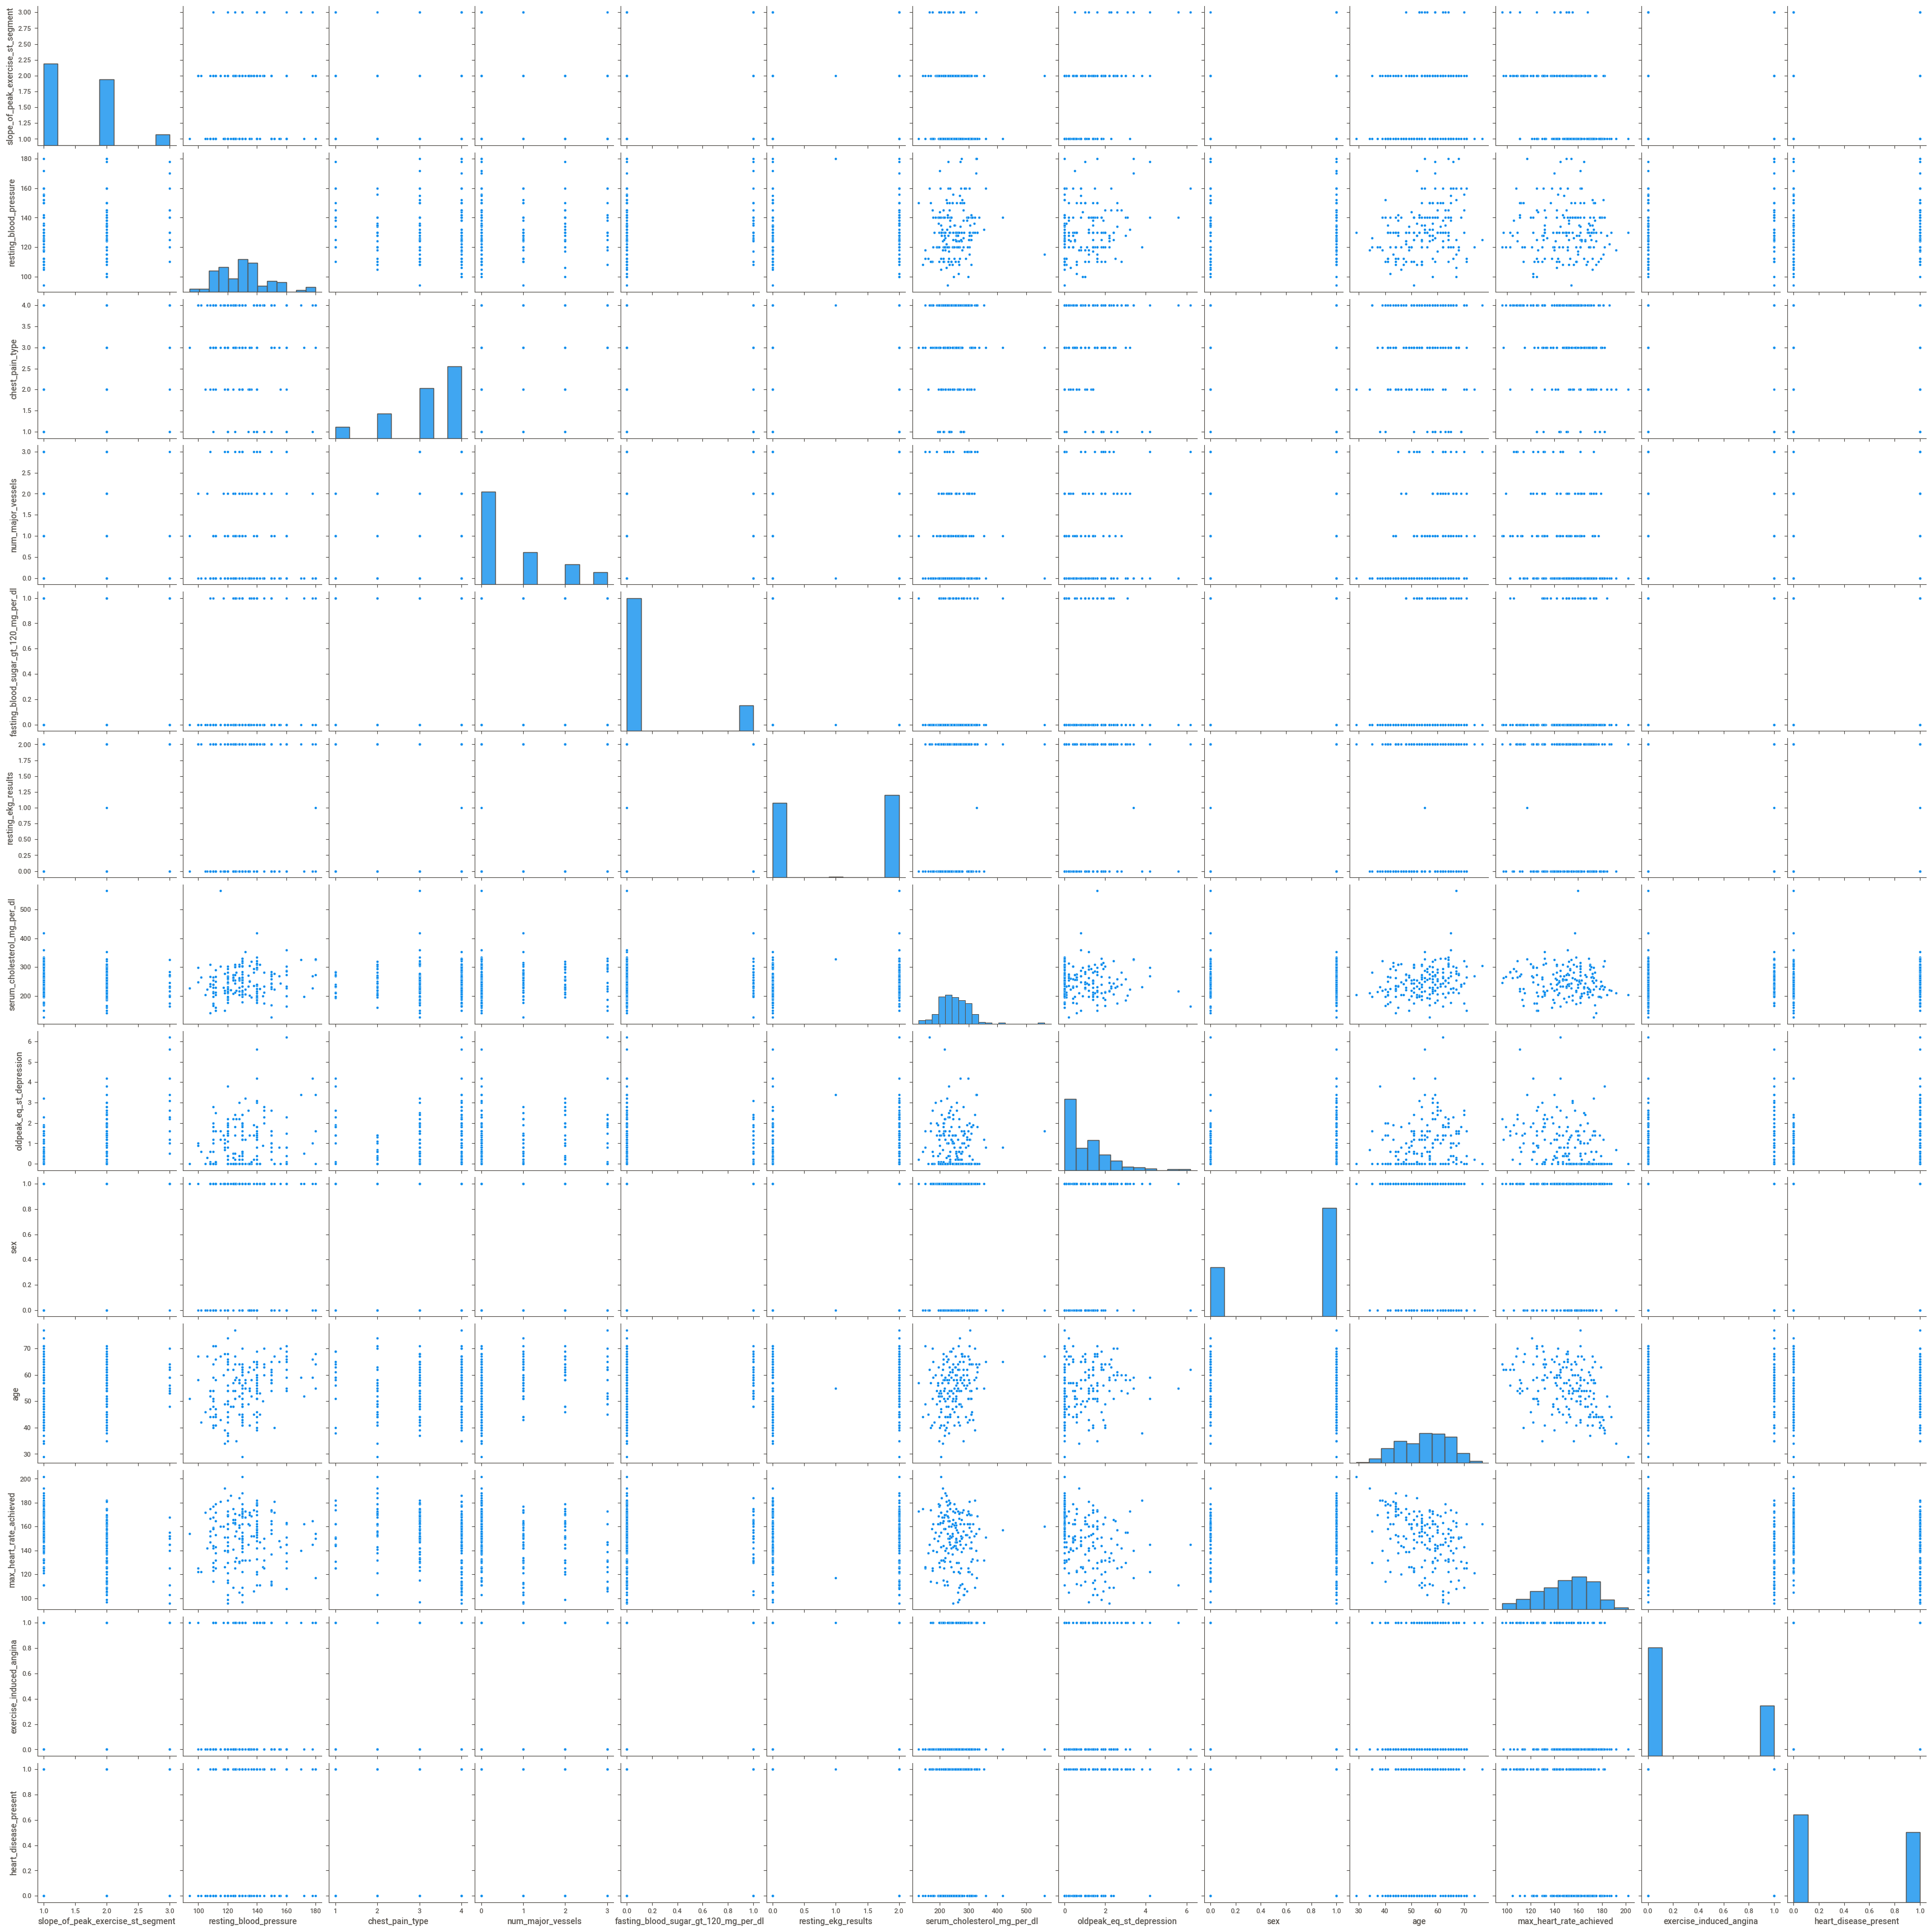

In [24]:
sns.pairplot(merge)

In [25]:
# Duplicate Data Checking

merge.duplicated().sum()

0

In [26]:
# Missing Value Checking

merge.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

# Converting Data from Categorical to Numerical Type

In [27]:
merge.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [28]:
merge.thal = merge.thal.map({'normal':0, 'reversible_defect':1, 'fixed_defect':2})

In [29]:
merge = merge.drop(['patient_id'], axis = 1)

In [30]:
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,0,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


# Outliers Checking

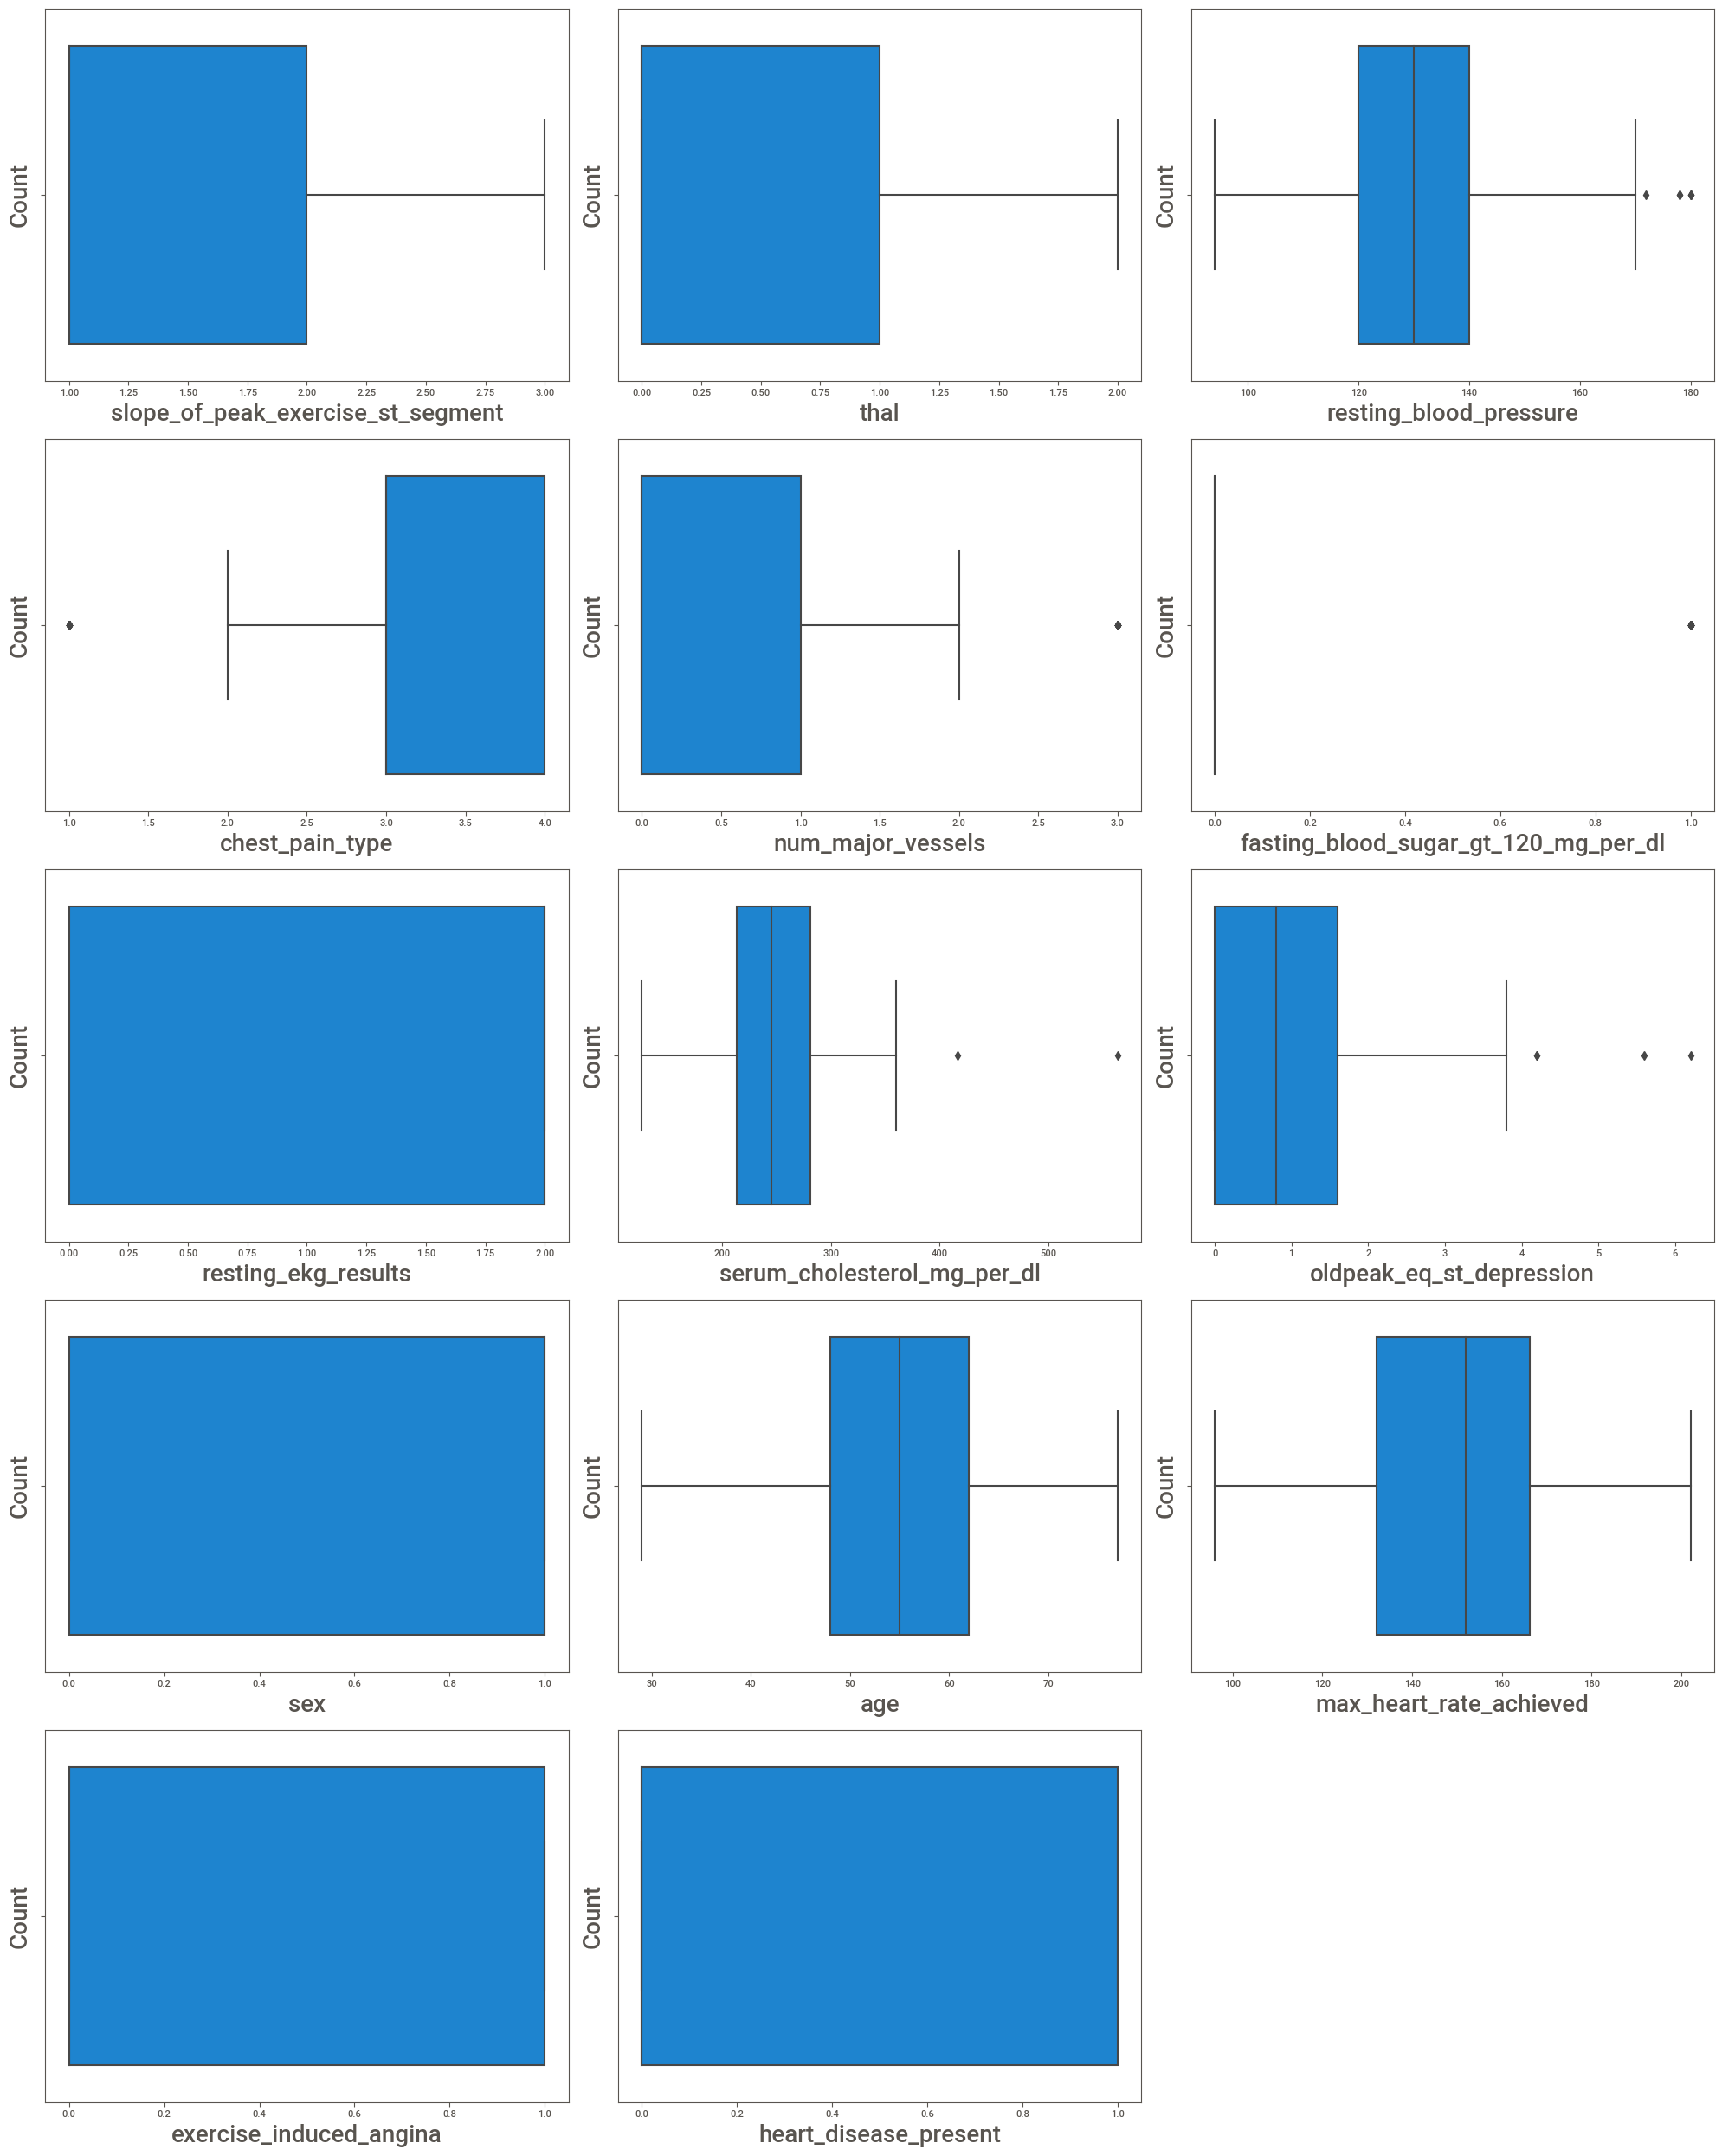

In [31]:
plotnum = 1
plt.figure(figsize = (20, 25), facecolor = 'white')
for column in merge:
    plt.subplot(5, 3, plotnum)
    sns.boxplot(x = merge[column])
    plt.xlabel(column, fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plotnum = plotnum + 1
plt.tight_layout()

In [40]:
from scipy import stats

IQR = stats.iqr(merge.resting_blood_pressure, interpolation = 'midpoint')
Q1_rbp = merge.resting_blood_pressure.quantile(0.25)
Q3_rbp = merge.resting_blood_pressure.quantile(0.75)
lower_limit_rbp = Q1_rbp - 1.5 * IQR
upper_limit_rbp = Q3_rbp + 1.5 * IQR
lower_limit_rbp, upper_limit_rbp
merge = merge[(merge.resting_blood_pressure < upper_limit_rbp)]
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,0,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2,1,150,4,2,0,2,258,2.6,0,60,157,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,140,4,0,0,0,239,1.2,1,54,160,0,0
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


<AxesSubplot:xlabel='resting_blood_pressure'>

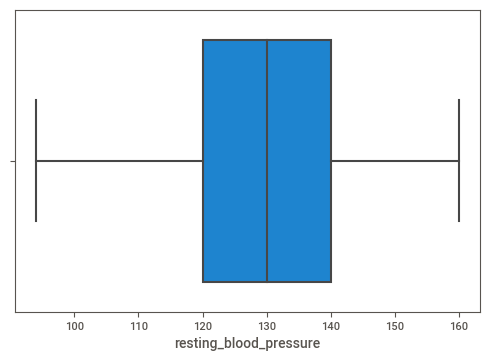

In [34]:
# Rechecking for Outliers

sns.boxplot(x = merge['resting_blood_pressure'])

In [41]:
# chest_pain_type

IQR = stats.iqr(merge.chest_pain_type, interpolation = 'midpoint')
Q1_rbp = merge.chest_pain_type.quantile(0.25)
Q3_rbp = merge.chest_pain_type.quantile(0.75)
lower_limit_rbp = Q1_rbp - 1.5 * IQR
upper_limit_rbp = Q3_rbp + 1.5 * IQR
lower_limit_rbp, upper_limit_rbp
merge = merge[(merge.chest_pain_type < upper_limit_rbp)]
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,0,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2,1,150,4,2,0,2,258,2.6,0,60,157,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,140,4,0,0,0,239,1.2,1,54,160,0,0
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


<AxesSubplot:xlabel='chest_pain_type'>

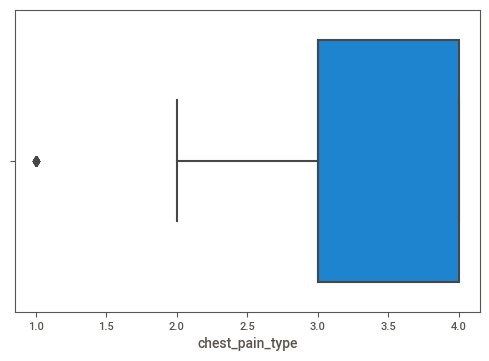

In [37]:
# Rechecking for Outliers

sns.boxplot(x = merge['chest_pain_type'])

In [44]:
# num_major_vessels

IQR = stats.iqr(merge.num_major_vessels, interpolation = 'midpoint')
Q1_rbp = merge.num_major_vessels.quantile(0.25)
Q3_rbp = merge.num_major_vessels.quantile(0.75)
lower_limit_rbp = Q1_rbp - 1.5 * IQR
upper_limit_rbp = Q3_rbp + 1.5 * IQR
lower_limit_rbp, upper_limit_rbp
merge = merge[(merge.num_major_vessels < upper_limit_rbp)]
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,0,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2,1,150,4,2,0,2,258,2.6,0,60,157,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,140,4,0,0,0,239,1.2,1,54,160,0,0
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


<AxesSubplot:xlabel='num_major_vessels'>

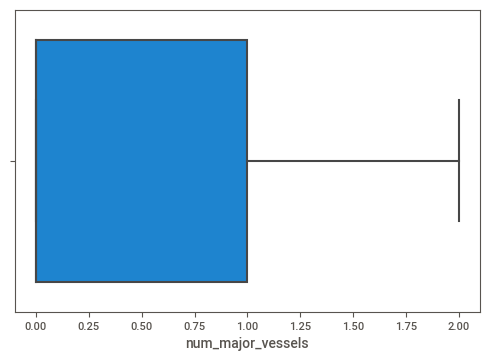

In [45]:
# Rechecking for Outliers

sns.boxplot(x = merge['num_major_vessels'])

In [49]:
# serum_cholesterol_mg_per_dl

IQR = stats.iqr(merge.serum_cholesterol_mg_per_dl, interpolation = 'midpoint')
Q1_rbp = merge.serum_cholesterol_mg_per_dl.quantile(0.25)
Q3_rbp = merge.serum_cholesterol_mg_per_dl.quantile(0.75)
lower_limit_rbp = Q1_rbp - 1.5 * IQR
upper_limit_rbp = Q3_rbp + 1.5 * IQR
lower_limit_rbp, upper_limit_rbp
merge = merge[(merge.serum_cholesterol_mg_per_dl < upper_limit_rbp)]
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,0,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2,1,150,4,2,0,2,258,2.6,0,60,157,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,140,4,0,0,0,239,1.2,1,54,160,0,0
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


<AxesSubplot:xlabel='serum_cholesterol_mg_per_dl'>

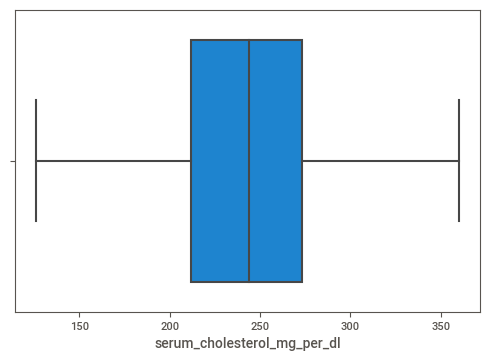

In [50]:
# Rechecking for Outliers

sns.boxplot(x = merge['serum_cholesterol_mg_per_dl'])

In [52]:
# oldpeak_eq_st_depression

IQR = stats.iqr(merge.oldpeak_eq_st_depression, interpolation = 'midpoint')
Q1_rbp = merge.oldpeak_eq_st_depression.quantile(0.25)
Q3_rbp = merge.oldpeak_eq_st_depression.quantile(0.75)
lower_limit_rbp = Q1_rbp - 1.5 * IQR
upper_limit_rbp = Q3_rbp + 1.5 * IQR
lower_limit_rbp, upper_limit_rbp
merge = merge[(merge.oldpeak_eq_st_depression < upper_limit_rbp)]
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,0,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2,1,150,4,2,0,2,258,2.6,0,60,157,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,140,4,0,0,0,239,1.2,1,54,160,0,0
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


<AxesSubplot:xlabel='oldpeak_eq_st_depression'>

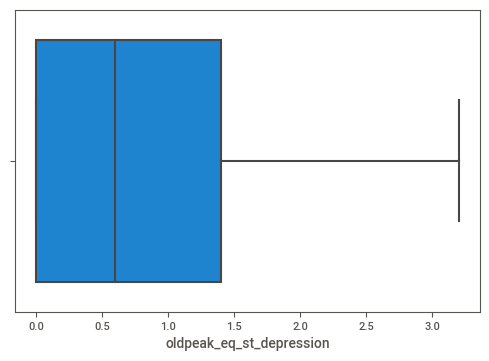

In [53]:
# Rechecking for Outliers

sns.boxplot(x = merge['oldpeak_eq_st_depression'])

In [54]:
# Feature

merge.corr()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.288090,-0.043740,0.126718,0.070468,0.140586,0.179044,-0.077734,0.548697,0.121027,0.172074,-0.415654,0.213271,0.305789
thal,0.288090,1.000000,0.125418,0.293743,0.205317,0.062664,0.006169,-0.055325,0.300157,0.444434,0.096512,-0.326985,0.337153,0.496705
resting_blood_pressure,-0.043740,0.125418,1.000000,-0.111252,0.049465,0.141173,0.077664,0.145349,0.090124,0.003638,0.251216,0.058401,0.008319,0.012149
chest_pain_type,0.126718,0.293743,-0.111252,1.000000,0.157653,-0.144066,0.025390,0.032086,0.086931,0.133225,0.018185,-0.254775,0.342630,0.401578
num_major_vessels,0.070468,0.205317,0.049465,0.157653,1.000000,0.133194,0.039324,0.184991,0.247005,0.072094,0.396893,-0.210941,0.181983,0.396619
fasting_blood_sugar_gt_120_mg_per_dl,0.140586,0.062664,0.141173,-0.144066,0.133194,1.000000,0.086610,-0.015082,0.017945,0.102060,0.162476,0.049686,0.001618,0.023088
resting_ekg_results,0.179044,0.006169,0.077664,0.025390,0.039324,0.086610,1.000000,0.137178,0.128564,0.040878,0.073013,-0.096207,0.045059,0.142255
serum_cholesterol_mg_per_dl,-0.077734,-0.055325,0.145349,0.032086,0.184991,-0.015082,0.137178,1.000000,-0.076060,-0.107560,0.161908,-0.075778,0.044722,0.137732
oldpeak_eq_st_depression,0.548697,0.300157,0.090124,0.086931,0.247005,0.017945,0.128564,-0.076060,1.000000,0.148313,0.236969,-0.324356,0.242071,0.350555
sex,0.121027,0.444434,0.003638,0.133225,0.072094,0.102060,0.040878,-0.107560,0.148313,1.000000,-0.119729,-0.067184,0.266951,0.375972


<AxesSubplot:>

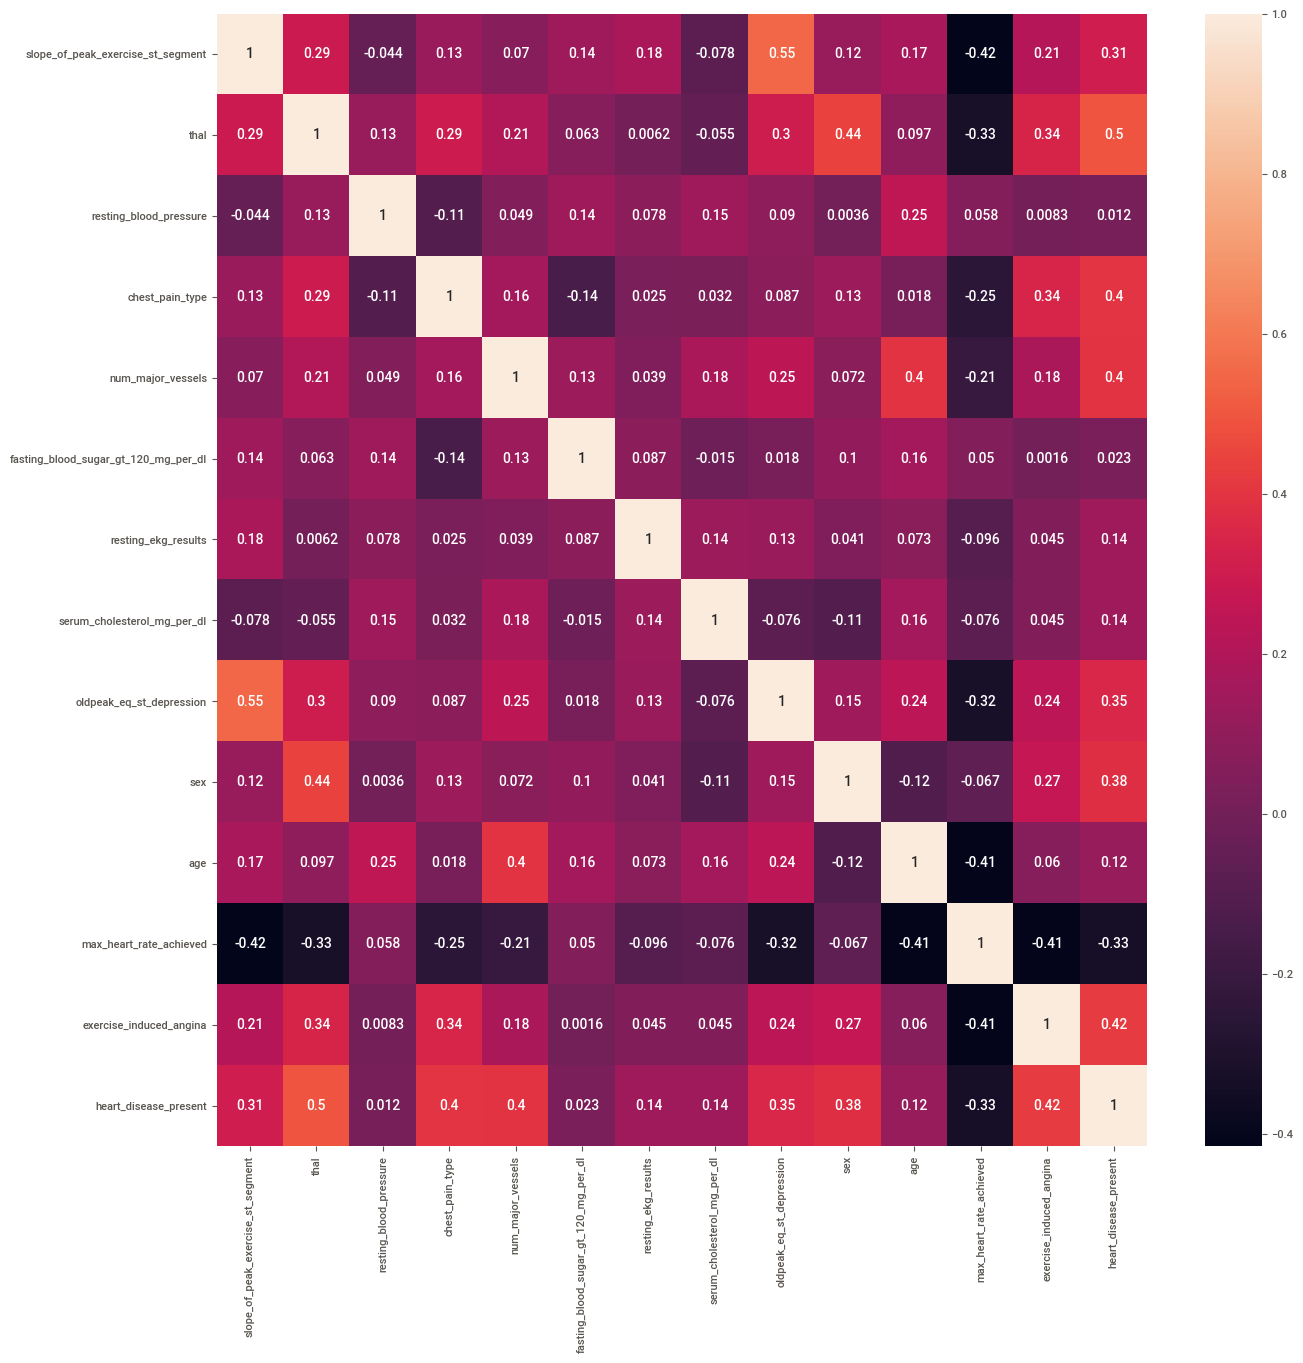

In [55]:
plt.figure(figsize = (15,15))
sns.heatmap(merge.corr(), annot = True)

In [56]:
merge.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

# Scaling

In [57]:
# MinMax Scalar

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
merge[['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present']]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,0,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2,1,150,4,2,0,2,258,2.6,0,60,157,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,140,4,0,0,0,239,1.2,1,54,160,0,0
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


# Splitting Training and Testing Data

In [59]:
X = merge[['slope_of_peak_exercise_st_segment','thal', 'resting_blood_pressure',
'chest_pain_type','num_major_vessels',
'fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results',
'serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age',
'max_heart_rate_achieved','exercise_induced_angina']]

y = merge[['heart_disease_present']]

In [60]:
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0
5,1,0,130,3,0,0,0,180,0.0,1,42,150,0
6,2,1,150,4,2,0,2,258,2.6,0,60,157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,140,4,0,0,0,239,1.2,1,54,160,0
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0


In [61]:
y

,heart_disease_present
0,0
1,0
3,1
5,0
6,1
...,...
174,0
175,1
177,1
178,0


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
X_train.shape

(124, 13)

In [78]:
y_train.shape

(124, 1)